Predicción de precios de viviendas - Machine learning

In [6]:
## Importación de paquetes
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Archivos ENAHO
archivos = [
    "enaho01-2024-100.dta",
    "enaho01-2023-100.dta",
    "enaho01-2022-100.dta"
]

In [26]:
# Columnas a leer
columnas = ["p101", "p105a", "p105b", "p104", "latitud", "longitud", "ubigeo"]

In [24]:
# Leer y unir los tres años
dfs = []
for archivo in archivos:
    df = pd.read_stata(archivo, columns=columnas)
    df["ub_prov"] = df["ubigeo"].astype(str).str[:4]
    dfs.append(df)

In [25]:
enaho = pd.concat(dfs, ignore_index=True)
enaho = enaho[(enaho["ub_prov"] == "1501") | (enaho["ub_prov"] == "0701")]

In [27]:
enaho.head()

,p101,p105a,p105b,p104,latitud,longitud,ubigeo,ub_prov
808,departamento en edificio,"propia, totalmente pagada",NaN,3.0,-12.068179,-77.11631,070104,0701
809,NaN,NaN,NaN,NaN,-12.068179,-77.11631,070104,0701
810,casa independiente,"propia, totalmente pagada",NaN,6.0,-12.068179,-77.11631,070104,0701
811,casa independiente,alquilada,1550.0,5.0,-12.068179,-77.11631,070104,0701
812,casa independiente,"propia, totalmente pagada",NaN,6.0,-12.068179,-77.11631,070104,0701


In [31]:
enaho.p105a.value_counts()#.plot(kind="pie")

p105a
propia, totalmente pagada              7246
alquilada                              2068
cedida por otro hogar o institucion    2023
propia, por invasion                    721
propia, comprandola a plazos            227
cedida por el centro de trabajo          10
otra forma                                7
Name: count, dtype: int64

In [32]:
casas_alq = enaho.query(" p105a ==  'alquilada' ").copy()

In [33]:
casas_alq

,p101,p105a,p105b,p104,latitud,longitud,ubigeo,ub_prov
811,casa independiente,alquilada,1550.0,5.0,-12.068179,-77.116310,070104,0701
814,departamento en edificio,alquilada,1080.0,3.0,-12.068179,-77.116310,070104,0701
853,casa independiente,alquilada,280.0,4.0,-11.840870,-77.162552,070106,0701
873,casa independiente,alquilada,365.0,3.0,-11.879931,-77.128036,070106,0701
881,"vivienda en casa de vecindad (callejon, solar ...",alquilada,300.0,1.0,-12.024878,-77.096931,070101,0701
...,...,...,...,...,...,...,...,...
119033,casa independiente,alquilada,650.0,3.0,-12.201382,-76.972595,150142,1501
119045,casa independiente,alquilada,450.0,3.0,-11.820972,-77.103813,150125,1501
119055,vivienda en quinta,alquilada,180.0,1.0,-11.928683,-76.679398,150118,1501
119083,casa independiente,alquilada,150.0,2.0,-11.901286,-76.941528,150132,1501


Análisis exploratorio de Datos

<Axes: >

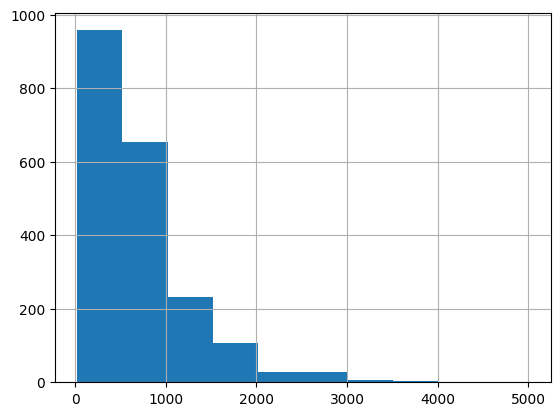

In [34]:
casas_alq.p105b.hist()#

<Axes: >

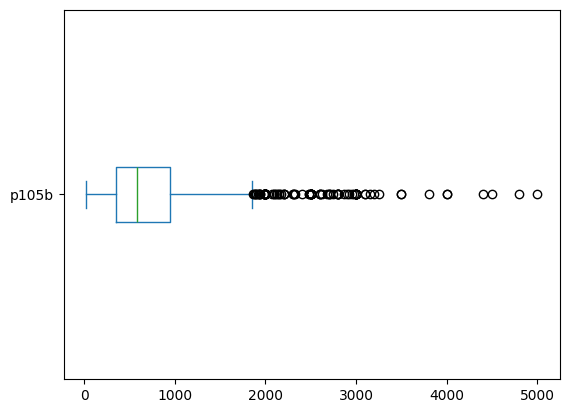

In [35]:
casas_alq.p105b.plot.box(vert=False)

<Axes: xlabel='p104'>

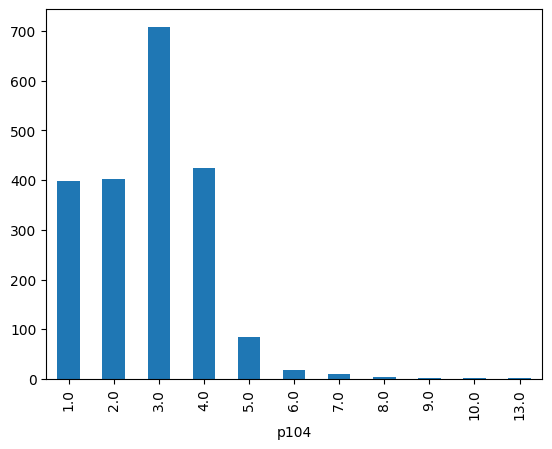

In [36]:
casas_alq.p104.value_counts().sort_index().plot(kind="bar")

## Relacion habitaciones - Precio

<Axes: xlabel='p104', ylabel='p105b'>

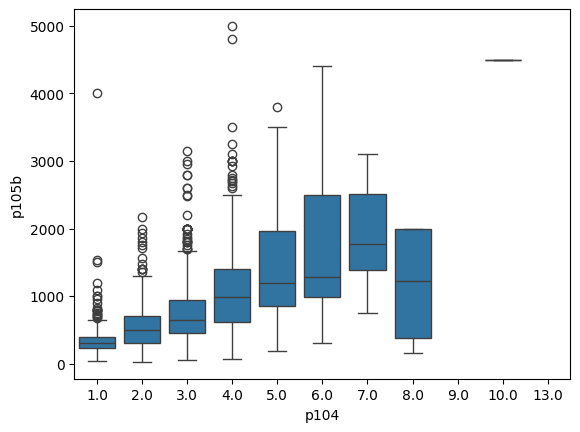

In [37]:
sns.boxplot(x="p104", y="p105b", data=casas_alq)

## Tipo de vivienda

In [38]:
casas_alq.p101.value_counts()#.plot(kind="pie")

p101
departamento en edificio                                     1068
casa independiente                                            789
vivienda en quinta                                            100
vivienda en casa de vecindad (callejon, solar o corralon)      97
choza o cabaña                                                  0
vivienda improvisada                                            0
local no destinado para habitacion humana                       0
Name: count, dtype: int64

<Axes: xlabel='p105b', ylabel='p101'>

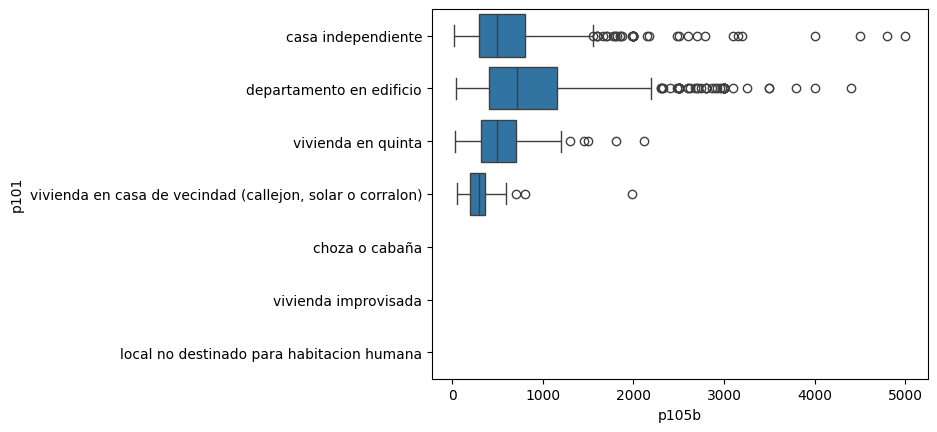

In [39]:
sns.boxplot(x="p105b", y="p101", data=casas_alq)

## Valores Perdidos

<Axes: >

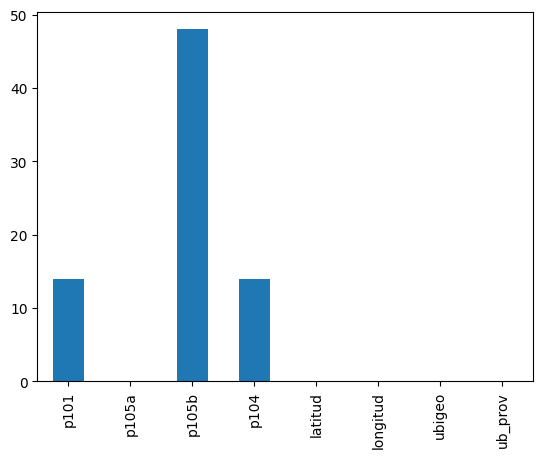

In [40]:
casas_alq.isna().sum().plot(kind="bar")

# Limpieza y Preparación de Datos

## Eliminando vacios

In [41]:
# Limpieza y Preparación de Datos

In [42]:
casas_alq.dropna(inplace=True)

In [43]:
casas_alq.isna().sum()

p101        0
p105a       0
p105b       0
p104        0
latitud     0
longitud    0
ubigeo      0
ub_prov     0
dtype: int64